In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from ROOT import TGraph2D, TCanvas



Welcome to JupyROOT 6.22/02


In [3]:
img=('screen_r_red_raw.png')
img

'screen_r_red_raw.png'

In [4]:
im=Image.open(img)

pix = np.array(im)

pix.size

/opt/conda/envs/pyRoot/lib/python3.8/site-packages/PIL/Image.py:2832: DecompressionBombWarning: Image size (99725400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


398901600

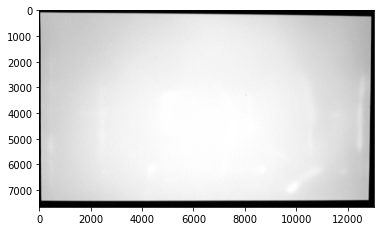

In [5]:
plt.imshow(im, cmap='gray')

In [6]:
pix

array([[[  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       [[  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        ...,
        [  4,   4,   4, 255],
        [  4,   4,   4, 255],
        [  4,   4,   4, 255]],

       ...,

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  2,   2,   2, 255],
        [  2,   2,   2, 255],
        [  2,   2,   2, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  2

In [7]:
pix[500][500]

array([194, 194, 194, 255], dtype=uint8)

In [8]:
pix[500][500][0]

194

In [9]:
pix[7000][13000].size

4

In [10]:
pix[:][:][:].shape

(7650, 13036, 4)

In [11]:
bright=0
for i in range(0,7650):
    for j in range(0,13036):
        bright=bright+pix[i][j][0]
average=bright/(7650*13036)

In [12]:
average

214.97339554416428

In [13]:
np.min(pix[:][:][0])

0

In [14]:
np.max(pix[:][:][0])

255

In [15]:
r=len(pix)

In [16]:
c=len(pix[0])

In [17]:
new_pix=np.zeros((r,c))
new_pix.shape

(7650, 13036)

In [18]:
for i in range(0,r):
    for j in range(0,c):
        z=pix[i][j][0]
        if z>100 :
            new_pix[i][j]=z

In [19]:
new_pix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

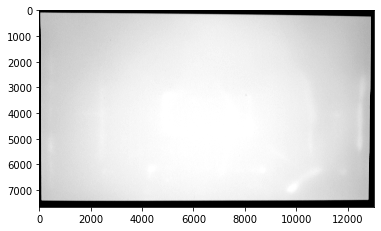

In [20]:
plt.imshow(new_pix, cmap='gray')

In [57]:
new_img=np.zeros((r,c,3), dtype="uint8")

In [58]:
for i in range(r):
    for j in range(c):
        if new_pix[i][j] >10:
            new_img[i][j][0]=new_pix[i][j]

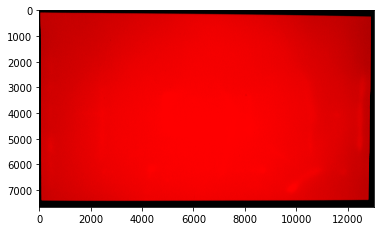

In [59]:
plt.imshow(new_img, cmap='gray')

In [60]:
new_img[500][500]

array([194,   0,   0], dtype=uint8)

In [62]:
new_bright=0
n=0
for i in range(r):
    for j in range(c):
        if new_img[i][j][0] >10:
            n=n+1
            new_bright=new_bright+new_img[i][j][0]
new_average=new_bright/n

In [63]:
new_average

229.91190343511335

In [61]:
im= Image.fromarray(new_img)
im.save("new_red.jpeg")

In [71]:
fix_red=np.zeros((r,c,3), dtype="float16")
for i in range(r):
    for j in range(c):
        if new_img[i][j][0]>10:
            fix_red[i][j][0]=new_average/new_img[i][j][0]

In [72]:
np.min(fix_red[fix_red>0])

0.902

In [73]:
np.max(fix_red)

2.275

In [82]:
normalize_red=fix_red*255/2.275

In [93]:
fix_red_img=np.trunc(normalize_red).astype(np.uint8)

In [94]:
fix_red_img[500][500]

array([132,   0,   0], dtype=uint8)

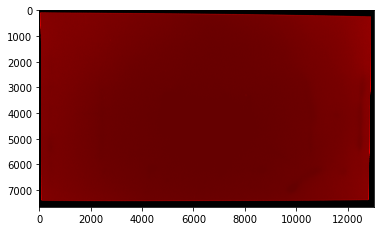

In [95]:
plt.imshow(fix_red_img, cmap='gray')

In [97]:
im= Image.fromarray(fix_red_img)
im.save("fix_red_img.png")